# **Wine Tasting**

## *Applying the Explainable Artifical Intelligence approach to wine quality assessment*

## **The dataset**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: 
- [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
- [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
- [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

## **Introduction**

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).
 
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods. 

Number of Instances: red wine - 1599; white wine - 4898. 

Number of Attributes: 11 + output attribute
  
Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data): 
12. quality (score between 0 and 10)

## **Looking through the data**

We are going to focus on white wine, purely because of the number of instances.

In [84]:
# IMPORTS AND DECLARATIONS
import IPython

import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def load_white_wine_data():
    return pd.read_csv('winequality-white.csv', sep=';')

def describe_wine_data(wine):
    display(IPython.display.Markdown('### Small sample'))
    display(wine.head())
    display(IPython.display.Markdown('### Feature datatypes'))
    display(wine.info())
    display(IPython.display.Markdown('### Feature distribution - statistics'))
    display(wine.describe())
    
    display(IPython.display.Markdown('### Feature distribution - plots'))
    wine.hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()

In [85]:
wine = load_white_wine_data()

### Small sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Feature datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

### Feature distribution - statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Feature distribution - plots

Saving figure attribute_histogram_plots


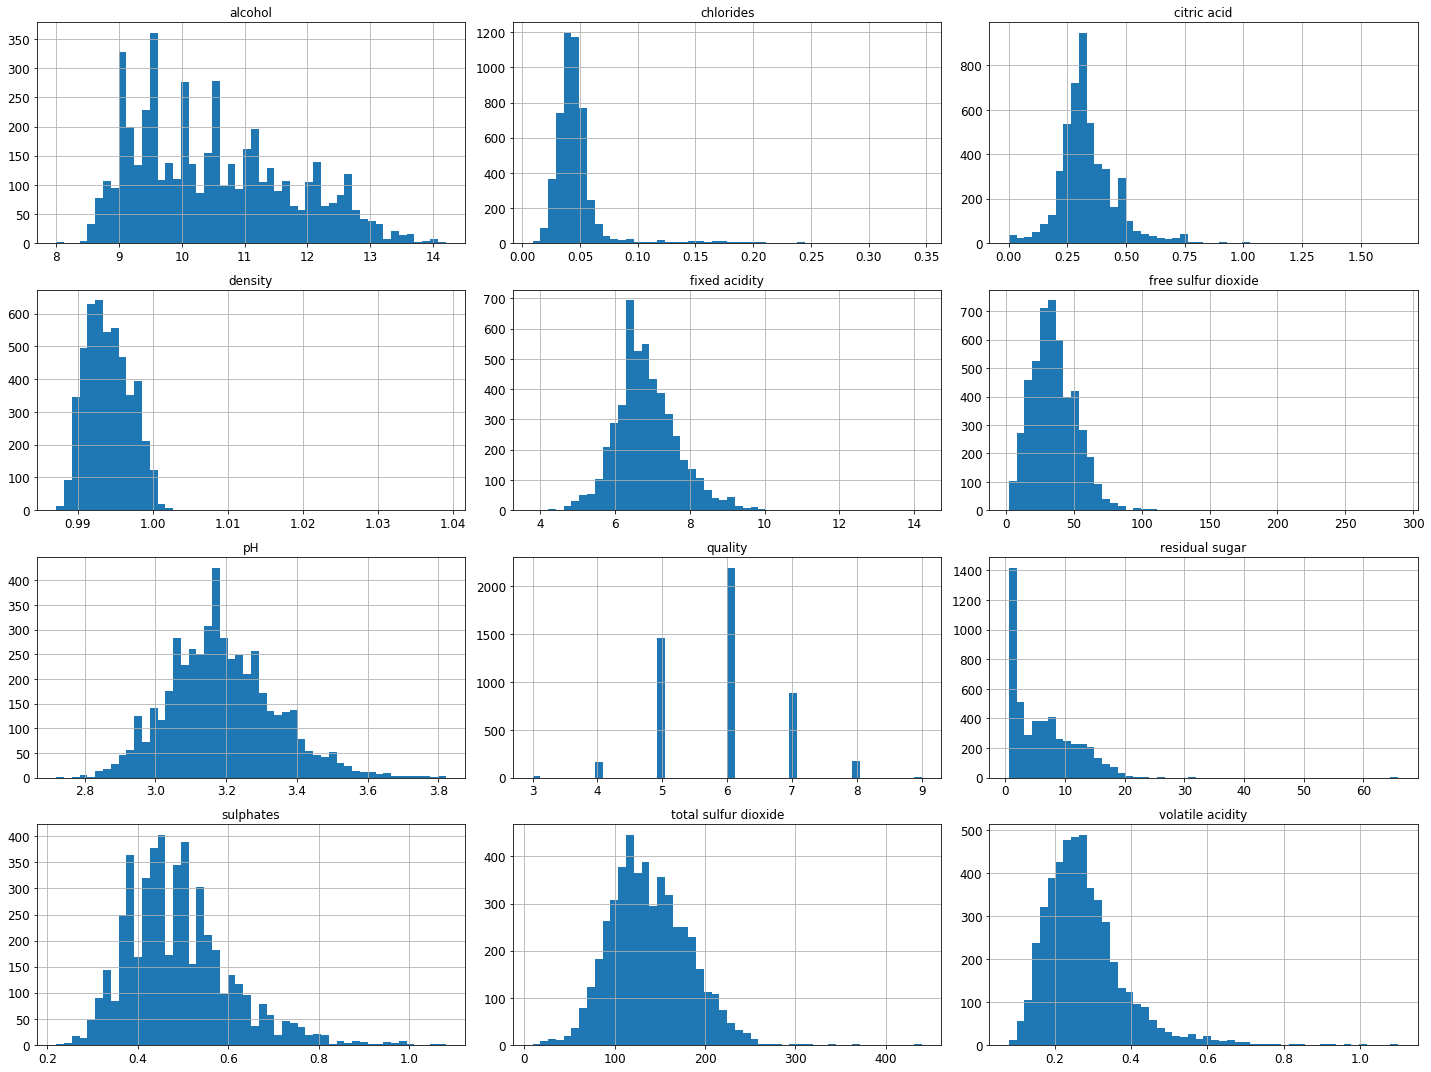

In [86]:
describe_wine_data(wine)

## **Preparing the data**

In [88]:
def norm(x, train_stats):
    return (x - train_stats['mean']) / train_stats['std']

def normalized_data(wine):
    # 80/20 split
    train_dataset = wine.sample(frac=0.8, random_state=0)
    test_dataset = wine.drop(train_dataset.index)
    
    # stats
    train_stats = train_dataset.describe()
    train_stats.pop('quality')
    train_stats = train_stats.transpose()
    display(IPython.display.Markdown('#### Feature statistics'))
    display(train_stats)
    
    # drop the label
    train_labels = train_dataset.pop('quality')
    test_labels = test_dataset.pop('quality')
    
    # return the normalized data
    normed_train_dataset = norm(train_dataset, train_stats)
    normed_test_dataset = norm(test_dataset, train_stats)
    return normed_train_dataset, normed_test_dataset, train_labels, test_labels

In [89]:
train_data, test_data, train_labels, test_labels = normalized_data(wine)

#### Feature statistics

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3918.0,6.858754,0.855479,4.20000,6.300000,6.80000,7.3000,14.20000
volatile acidity,3918.0,0.278278,0.100173,0.08000,0.210000,0.26000,0.3200,1.00500
citric acid,3918.0,0.334722,0.122170,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,3918.0,6.380028,5.057262,0.60000,1.700000,5.20000,9.8500,65.80000
chlorides,3918.0,0.045709,0.022408,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,3918.0,35.172282,17.139453,2.00000,23.000000,34.00000,45.0000,289.00000
total sulfur dioxide,3918.0,137.688999,42.577736,9.00000,107.000000,133.50000,166.0000,440.00000
density,3918.0,0.994021,0.002987,0.98711,0.991753,0.99373,0.9961,1.03898
pH,3918.0,3.187412,0.151155,2.72000,3.080000,3.18000,3.2800,3.82000
sulphates,3918.0,0.489104,0.114159,0.23000,0.410000,0.47500,0.5500,1.08000


## **Models**

## **Linear regression model**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

import eli5
from eli5.sklearn import PermutationImportance

def trained_linear_regression_model(train_data, train_labels):
    train_X, val_X, train_y, val_y = train_test_split(train_data, train_labels, random_state=1)
    return linear_model.LinearRegression().fit(train_X, train_y)

def linear_regression_fitness_evaluation(model, test_data, test_labels):
    # Make predictions using the testing set
    pred_labels = model.predict(test_data)

    display(IPython.display.Markdown('### *Model fitness*'))
    print('Mean squared error: %.2f' % mean_squared_error(test_labels, pred_labels))
    print('Coefficient of determination: %.2f'% r2_score(test_labels, pred_labels))

    # Plot outputs
    plt.scatter(test_labels, pred_labels)
    plt.xlabel('True Values [Quality]')
    plt.ylabel('Predictions [Quality]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    _ = plt.plot([0, 10], [0, 10])

    plt.show()
    
def linear_regression_explanation(model):
    perm = PermutationImportance(linear_regression_model, random_state=1).fit(normed_train_data, train_labels)
    display(IPython.display.Markdown('### *Feature importance after permutation*'))
    display(eli5.show_weights(perm, feature_names = val_X.columns.tolist()))

### *Model fitness*

Mean squared error: 0.53
Coefficient of determination: 0.30


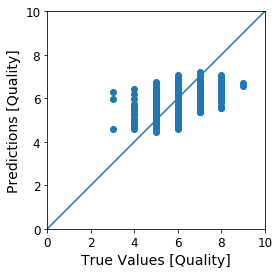

### *Feature importance after permutation*

Weight,Feature
0.2720 ± 0.0213,residual sugar
0.2694 ± 0.0148,density
0.2283 ± 0.0068,alcohol
0.0974 ± 0.0126,volatile acidity
0.0188 ± 0.0036,pH
0.0110 ± 0.0043,free sulfur dioxide
0.0092 ± 0.0027,sulphates
0.0030 ± 0.0020,fixed acidity
0.0000 ± 0.0001,total sulfur dioxide
-0.0000 ± 0.0001,chlorides


In [103]:
linear_regression_model = trained_linear_regression_model(train_data, train_labels)
linear_regression_fitness_evaluation(linear_regression_model, test_data, test_labels)
linear_regression_explanation(linear_regression_model)

## **Random Forest Classifier**

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import eli5
from eli5.sklearn import PermutationImportance

def trained_random_forest_model(train_data, train_labels):
    train_X, val_X, train_y, val_y = train_test_split(train_data, train_labels, random_state=1)
    return RandomForestRegressor(n_estimators=50, random_state=1).fit(train_X, train_y)

def random_forest_fitness_evaluation(model, test_data, test_labels):
    # Make predictions using the testing set
    pred_labels = model.predict(test_data)

    display(IPython.display.Markdown('### *Model fitness*'))
    print('Mean squared error: %.2f' % mean_squared_error(test_labels, pred_labels))
    print('Coefficient of determination: %.2f'% r2_score(test_labels, pred_labels))

    # Plot outputs
    plt.scatter(test_labels, pred_labels)
    plt.xlabel('True Values [Quality]')
    plt.ylabel('Predictions [Quality]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    _ = plt.plot([0, 10], [0, 10])

    plt.show()
    
def random_forest_explanation(model):
    perm = PermutationImportance(linear_regression_model, random_state=1).fit(normed_train_data, train_labels)
    display(IPython.display.Markdown('### *Feature importance after permutation*'))
    display(eli5.show_weights(perm, feature_names = val_X.columns.tolist()))

### *Model fitness*

Mean squared error: 0.39
Coefficient of determination: 0.49


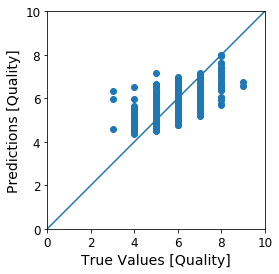

### *Feature importance after permutation*

Weight,Feature
0.2720 ± 0.0213,residual sugar
0.2694 ± 0.0148,density
0.2283 ± 0.0068,alcohol
0.0974 ± 0.0126,volatile acidity
0.0188 ± 0.0036,pH
0.0110 ± 0.0043,free sulfur dioxide
0.0092 ± 0.0027,sulphates
0.0030 ± 0.0020,fixed acidity
0.0000 ± 0.0001,total sulfur dioxide
-0.0000 ± 0.0001,chlorides


In [111]:
random_forest_model = trained_random_forest_model(train_data, train_labels)
random_forest_fitness_evaluation(random_forest_model, test_data, test_labels)
random_forest_explanation(random_forest_model)